# Geminiflix: IA para recomendar um filme ou série da Netflix

Quantas vezes você já se viu indeciso sobre qual filme assistir? Você sabe mais ou menos o que deseja, mas encontrar o título perfeito parece uma tarefa impossível? Eu certamente já passei por isso inúmeras vezes. Por isso, apresento o Geminiflix! Ele é o assistente perfeito para esses momentos de indecisão. Com Geminiflix ao seu lado, você nunca mais perderá tempo procurando o filme ideal.

Basta descrever o que você está procurando, e Geminiflix irá encontrar as opções perfeitas para você. Adeus indecisão, olá entretenimento sem esforço com Adolfo!

![](https://img.quizur.com/f/img5ccf5397a373e4.97710914.jpg?lastEdited=1557091227)

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Configurando acesso ao google AI

In [ ]:
# Import the Python SDK
import google.generativeai as genai
from google.colab import userdata # para evitar de vazar minha chave

api_key = userdata.get("SECRET_KEY") # está lá no campo "secrets", addnew secret
GOOGLE_API_KEY= api_key
genai.configure(api_key=GOOGLE_API_KEY)


In [ ]:
model = "models/embedding-001"

In [ ]:
def embed_fn(title, text):
  return genai.embed_content(model=model,
                                 content=text,
                                 title=title,
                                 task_type="RETRIEVAL_DOCUMENT")["embedding"]

# Analisando a base de dados

Lendo informações de filmes e séries da netflix. Dados extraídos do Kaggle

In [3]:
df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

temos 8807 filmes e 12 informações sobre eles

<Axes: xlabel='release_year', ylabel='count'>

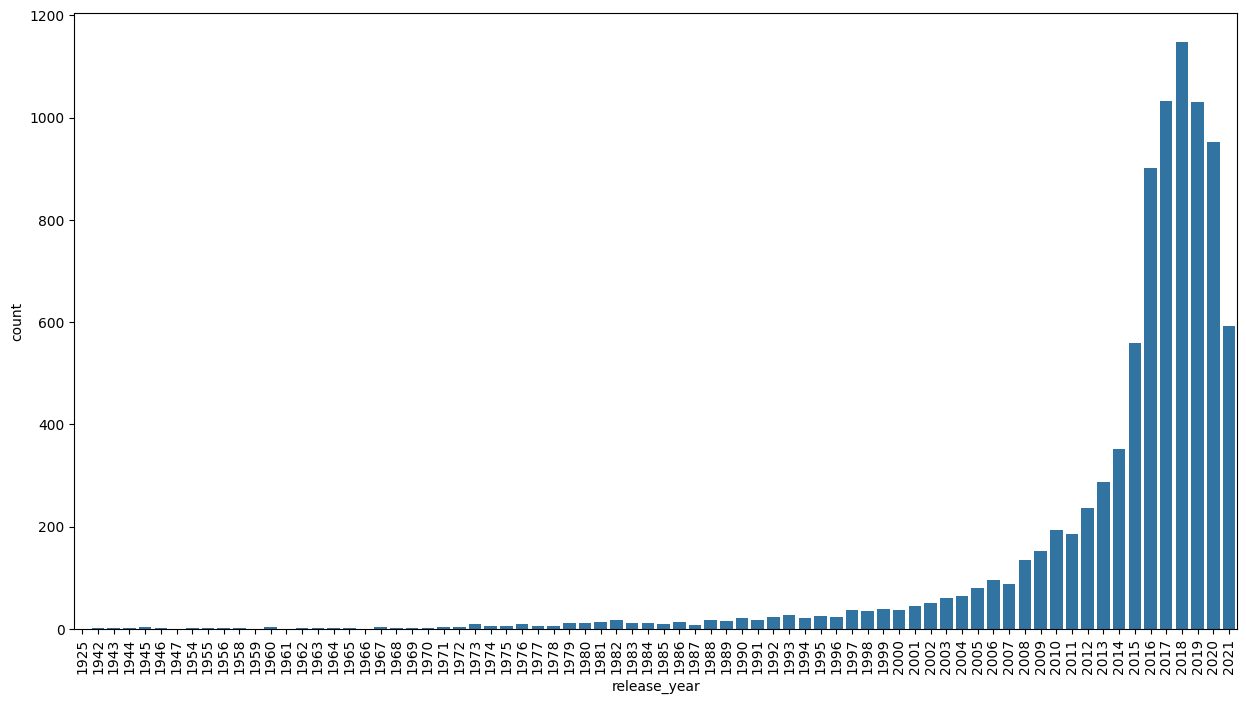

In [5]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)

sns.countplot(x="release_year", data = df)

bastante filmes entre 2017 e 2019

In [10]:
df["listed_in"].value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [12]:
df.loc[(df['type']=='Movie'),'listed_in'].value_counts()

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Sci-Fi & Fantasy                                      1
Sports Movies                                         1
Children & Family Movies, Comedies, Cult Movies       1
Cult Movies, Dramas, Music & Musicals                 1
Cult Movies, Dramas, Thrillers                        1
Name: count, Length: 278, dtype: int64

In [13]:
df.loc[(df['type']=='TV Show'),'listed_in'].value_counts()

listed_in
Kids' TV                                                 220
International TV Shows, TV Dramas                        121
Crime TV Shows, International TV Shows, TV Dramas        110
Kids' TV, TV Comedies                                     99
Reality TV                                                95
                                                        ... 
Kids' TV, TV Action & Adventure, TV Dramas                 1
British TV Shows, Kids' TV, TV Thrillers                   1
Reality TV, TV Horror, TV Thrillers                        1
TV Action & Adventure, TV Horror, TV Sci-Fi & Fantasy      1
Classic & Cult TV, Crime TV Shows, TV Dramas               1
Name: count, Length: 236, dtype: int64

<Axes: xlabel='type', ylabel='count'>

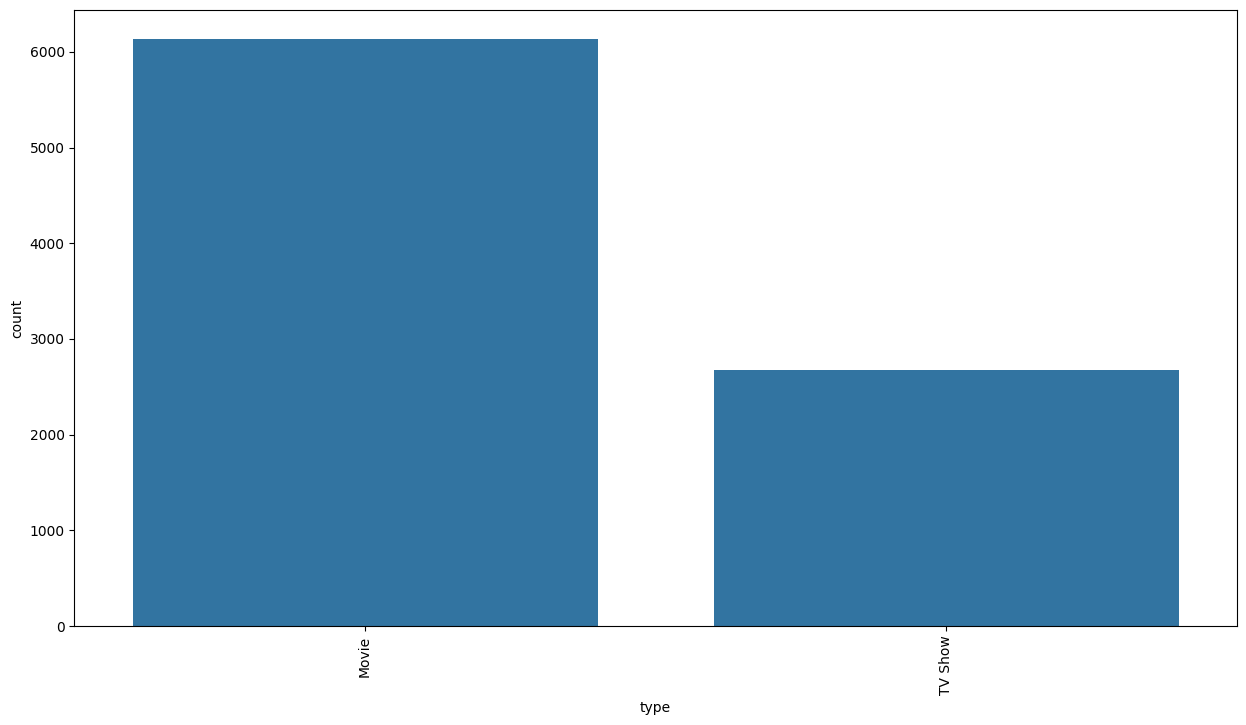

In [9]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)

sns.countplot(x="type", data = df)

In [ ]:
movies200 = df.loc[:200]

In [ ]:
movies200.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Embeddings
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...","[0.029202227, 0.015221124, -0.0437329, -0.0660..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[0.0138218375, -0.058204412, -0.06882556, -0.0..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[0.035966843, 0.02418106, -0.015667688, -0.047..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[0.0654788, -0.020138707, -0.031497397, -0.023..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[0.07568345, -0.061988436, -0.022867551, -0.03..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,"[0.040633656, -0.023971163, -0.0670573, 0.0234..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,"[0.029979512, -0.004055698, -0.07758261, -0.00..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","[0.03909263, -0.02030751, -0.031648815, -0.001..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,"[-0.0010233336, -0.046304315, -0.025035389, -0..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,"[0.00836848, -0.0065416913, -0.008437847, 0.01..."


In [ ]:
movies200.title.unique()

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands',
       'Jailbirds New Orleans', 'Kota Factory', 'Midnight Mass',
       'My Little Pony: A New Generation', 'Sankofa',
       'The Great British Baking Show', 'The Starling',
       'Vendetta: Truth, Lies and The Mafia', 'Bangkok Breaking',
       'Je Suis Karl', 'Confessions of an Invisible Girl',
       'Crime Stories: India Detectives', 'Dear White People',
       "Europe's Most Dangerous Man: Otto Skorzeny in Spain",
       'Falsa identidad', 'Intrusion', 'Jaguar',
       'Monsters Inside: The 24 Faces of Billy Milligan',
       'Resurrection: Ertugrul', 'Avvai Shanmughi',
       'Go! Go! Cory Carson: Chrissy Takes the Wheel', 'Jeans',
       'Love on the Spectrum', 'Minsara Kanavu', 'Grown Ups',
       'Dark Skies', 'Paranoia', 'Ankahi Kahaniya', 'Chicago Party Aunt',
       'Sex Education', 'Squid Game', 'Tayo and Little Wizards',
       'The Father Who Moves Mountains', 'The Stronghold', 'Angry Birds',
       'Birth of

Selecionei 200 primeiros filmes da base para formar a base de conhecimento do Gemini

In [ ]:
movies200["Embeddings"] = movies200.apply(lambda row: embed_fn(row["title"], row["description"]), axis=1)
movies200.head(10)

<ipython-input-11-b3da51258043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies200["Embeddings"] = movies200.apply(lambda row: embed_fn(row["title"], row["description"]), axis=1)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Embeddings
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...","[0.029202227, 0.015221124, -0.0437329, -0.0660..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[0.0138218375, -0.058204412, -0.06882556, -0.0..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[0.035966843, 0.02418106, -0.015667688, -0.047..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[0.0654788, -0.020138707, -0.031497397, -0.023..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[0.07568345, -0.061988436, -0.022867551, -0.03..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,"[0.040633656, -0.023971163, -0.0670573, 0.0234..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,"[0.029979512, -0.004055698, -0.07758261, -0.00..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","[0.03909263, -0.02030751, -0.031648815, -0.001..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,"[-0.0010233336, -0.046304315, -0.025035389, -0..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,"[0.00836848, -0.0065416913, -0.008437847, 0.01..."


In [ ]:
movies200.to_csv('embeddings.csv')

Encontrando o filme com base na semelhança das palavras utilizadas pelo usuário e as palavras composta dentro da base de conhecimento

In [ ]:
# encontrar o filme semelhante com a entrada do usuário
def gerar_e_buscar_consulta(consulta, base, model):
  embedding_da_consulta = genai.embed_content(model=model,
                                 content=consulta,
                                 task_type="RETRIEVAL_QUERY")["embedding"]

  produtos_escalares = np.dot(np.stack(base["Embeddings"]), embedding_da_consulta)

  indice = np.argmax(produtos_escalares)
  return base.iloc[indice]["description"], base.iloc[indice]["title"]

In [ ]:
consulta = "I want to watch something about ninjas and fighting with little romance"

trecho, titulo = gerar_e_buscar_consulta(consulta, movies200, model)
print(f'Filme {titulo}')
print(trecho)


Filme Naruto the Movie 2: Legend of the Stone of Gelel
While on a mission to return a missing pet, Naruto and two fellow ninjas are ambushed by brutal knights led by the enigmatic Temujin.


In [ ]:
# para deixar o output mais apresentável
import textwrap
from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

Configurando alguns parâmetros. Deixei a temperatura como 0.2 para o output ficar um pouco mais conservador porém permitindo que ele altere algmas estruturas do texto.

In [ ]:
generation_config = {
  "temperature": 0.2,
  "candidate_count": 1
}

#configurações de segurança
safety_settings = {
    "HARASSMENT": "BLOCK_LOW_AND_ABOVE",
    "HATE":"BLOCK_LOW_AND_ABOVE",
    "SEXUAL": "BLOCK_NONE",
    "DANGEROUS": "BLOCK_LOW_AND_ABOVE"
}

Agora vou chamar a parte de text generation do Gemini para gerar um texto em português e mais informal da descrição do filme

In [ ]:
prompt = f"You are friend of someone and you are recommended a movie to someone based on what they said. Rewrite this text leaving it in Portuguese and in a more informal way and friendly, without adding information that is not part of the text: {trecho} movie name {titulo}"

model_2 = genai.GenerativeModel("gemini-1.0-pro",
                                generation_config=generation_config,safety_settings=safety_settings)
response = model_2.generate_content(prompt)


In [ ]:
#print(response.text)

Quando uns ninjas estranhos atacam a vila de Konohagakure, cabe ao ninja adolescente Naruto e seu amigo Sasuke, que tava sumido há um tempão, salvar o planeta. Filme: Naruto Shippûden the Movie: Bonds


In [ ]:
display(to_markdown(f'**Geminiflix**: {response.text}'))
print('-------------------------------------------')

> **Adolfo**: E aí, cara!
> 
> Lembra quando você tava falando que tava a fim de ver um filme maneiro? Então, eu lembrei de um que acho que você vai curtir: Naruto o Filme 2: A Lenda da Pedra de Gelel.
> 
> É sobre o Naruto e dois ninjas que tão numa missão pra devolver um bicho perdido, mas aí eles são atacados por uns cavaleiros brutos liderados por um cara misterioso chamado Temujin. É bem legal, tem muita ação e aventura!

-------------------------------------------
